# Simulaciones

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import matplotlib.cm as cm

## Función para generar dinámicamente una matriz en bloques (diagonales son cero)

In [45]:
def make_corr_matrix(groups: list, corrs: list)->np.ndarray:
    mat_holder = np.zeros(shape=(sum(groups), sum(groups)))
    for index,group in enumerate(groups):
        if index == 0:
            myrange = list(range(0, group))
            index_i = 0
            index_j = 0
            for index_i in myrange:
                for index_j in myrange:
                    mat_holder[index_i, index_j] = corrs[index]
        else:
            myrange = list(range(sum(groups[:index]), sum(groups[:index+1])))
            for index_i in myrange:
                for index_j in myrange:
                    mat_holder[index_i, index_j] = corrs[index]
    np.fill_diagonal(mat_holder, 1.0)
    return mat_holder

### ejemplos

In [46]:
make_corr_matrix([4,2,2], [0.2, 0.3,0.4])

array([[1. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 1. , 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 1. , 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0.3, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.3, 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.4, 1. ]])

In [47]:
make_corr_matrix([5, 2, 3], [0.1, 0.3, 0.7])

array([[1. , 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 1. , 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 1. , 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 1. , 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 0.1, 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0.3, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.3, 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.7, 0.7],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 1. , 0.7],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0.7, 1. ]])

## Simulando retornos a través de cholensky

In [48]:
corr_matrix = make_corr_matrix([70, 50, 20, 35, 25, 40, 50, 50 , 20, 40], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
number_of_obs = 500
number_of_assets = corr_matrix.shape[0]
# En caso de que la matriz sea distinta de cero 
#means = np.zeros(number_of_assets)
Means = np.full((number_of_obs, number_of_assets), 0)


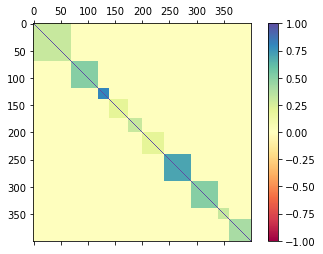

In [50]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(corr_matrix, vmin=-1, vmax=1, cmap = cm.Spectral)
fig.colorbar(caxs)

In [51]:
Z = np.random.normal(size = number_of_assets * number_of_obs)
Z.shape

(200000,)

In [52]:
Z = Z.reshape((number_of_assets,number_of_obs))
Z.shape

(400, 500)

In [53]:
L = np.linalg.cholesky(corr_matrix)
L.shape

(400, 400)

In [54]:
daily_returns =  Means.T + np.inner(L, np.transpose(Z))

In [55]:
sample_corr = np.corrcoef(daily_returns)

In [57]:
daily_returns.min()

-4.386391558329296

In [58]:
daily_returns.mean()

-0.0019285937858964848

In [59]:
daily_returns.max()

4.554057536089456

<AxesSubplot:ylabel='Density'>

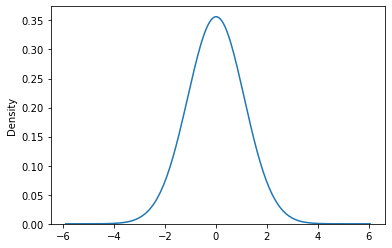

In [60]:
sns.kdeplot(daily_returns.flatten(), bw_method=0.5, fill=False, alpha = 1)

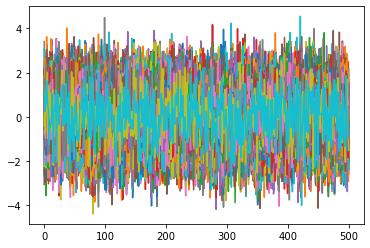

In [61]:
plt.plot(daily_returns.T);

In [62]:
daily_returns.shape

(400, 500)

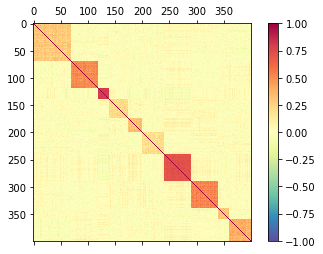

In [63]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(sample_corr, vmin=-1, vmax=1, cmap = cm.Spectral_r)
fig.colorbar(caxs)

## TODO
- Distancia de frobenius promedio (sobre distintas realizaciones)
- Gráfica de mapeo de los valores propios ( es equivalente)
- Se pueden mostrar escenarios distintos (tanto en el número de bloques, q)

## Simulando retornos con una normal mutlivariada

In [64]:
corr_matrix = make_corr_matrix([70, 50, 20, 35, 25, 40, 50, 50 , 20, 40], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])

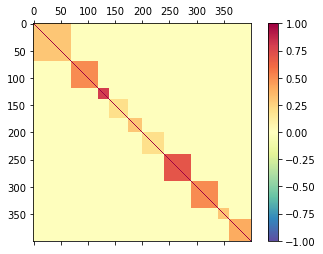

In [65]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(corr_matrix, vmin=-1, vmax=1, cmap = cm.Spectral_r)
fig.colorbar(caxs)

In [66]:
daily_returns = np.random.multivariate_normal(mean = np.zeros(400), cov = corr_matrix, size=800)

In [67]:
daily_returns.shape

(800, 400)

In [68]:
est_corr = np.corrcoef(daily_returns.T)

<AxesSubplot:ylabel='Density'>

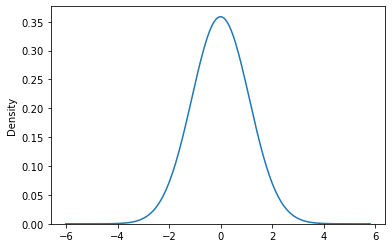

In [69]:
sns.kdeplot(daily_returns.flatten(), bw_method=0.5, fill=False, alpha = 1)

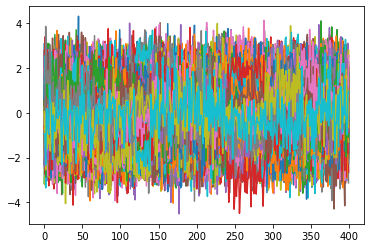

In [70]:
plt.plot(daily_returns.T);

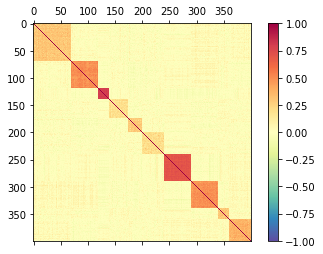

In [71]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(est_corr, vmin=-1, vmax=1, cmap = cm.Spectral_r)
fig.colorbar(caxs)

# cambiar colores de los heatmaps